# Milestones 1

## Introduction
- Name : Elita Kabayeva
- Batch : 008

## The Goals :
1. Understanding the Use of Tensorflow in Data Analysis
2. Implementing ANN

## Import Libraries

First thing first, we are going to import five libraries we are going to use for data loading and data preprocessing.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

Then, we are going to load the data. Since we are using google colab, thus we need to use the library from colab to import the files we are going to load.

In [3]:
# from google.colab import files
# uploaded = files.upload()

After the csv file is uploaded, then we can load it using the pandas libraries. Although for the model predict we will use Tensorflow, since this data is in csv format, we are going to use pandas to load it.

In [4]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data_ori = data.copy

Next, checking the shape of the data to get the image of the data size we are dealing with.

In [5]:
data.shape

(7043, 21)

After that, we will display 5 top rows of this data

In [6]:
pd.set_option('display.max_columns', None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Following by checking the data info. Not only to check the Dtype of each column in the data but also to get a glimpse if this data has any missing value.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the data info we roughly can see that this data somewhat has no missing value, but I would like to recheck with the percent missing as following:

In [8]:
percent_missing = (data.isnull().sum() * 100 / len(data)).round(2)
missing_value_data = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_data

,column_name,percent_missing
customerID,customerID,0.0
DeviceProtection,DeviceProtection,0.0
TotalCharges,TotalCharges,0.0
MonthlyCharges,MonthlyCharges,0.0
PaymentMethod,PaymentMethod,0.0
PaperlessBilling,PaperlessBilling,0.0
Contract,Contract,0.0
StreamingMovies,StreamingMovies,0.0
StreamingTV,StreamingTV,0.0
TechSupport,TechSupport,0.0


From the percent missing, we also got zero for all missing percentage in all columns. We will take it as the data is clean **for now**.

Next, I'm checking the statistical distribution for the data. First is the numerical columns:

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


I notice something weird within this numerical statistic. 

Notice that there are only three columns with one of them is the *Monthly Charges*. Whereas, previously we saw there is a column called as TotalCharges and it does being filled with numbers just like MonthlyCharges. But it doesn't show on the statistic above.

To check, I'm going to load the statistical distribution for the categorical data as followed:

In [10]:
numeric_columns = list(data.select_dtypes(include=np.number).columns)
categorical_columns = list(data.select_dtypes(include="object").columns)

In [11]:
data[categorical_columns].describe().T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


True to our suspicion, the TotalCharges column does appear in the categorical data above. Which is weird.

To further check, I'm going to list the uniques in each categorical columns.

In [12]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'customerID': 7043,
 'gender': 2,
 'Partner': 2,
 'Dependents': 2,
 'PhoneService': 2,
 'MultipleLines': 3,
 'InternetService': 3,
 'OnlineSecurity': 3,
 'OnlineBackup': 3,
 'DeviceProtection': 3,
 'TechSupport': 3,
 'StreamingTV': 3,
 'StreamingMovies': 3,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 4,
 'TotalCharges': 6531,
 'Churn': 2}

In [13]:
for column in data:
  if data[column].dtypes == object:  
    print(column+" :",data[column].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


Our suspicion remains true as we could see clearly, although it does have the appearance of numbers, the TotalCharges are listed as object Dtypes. 

This could lead to potential difficulties most importantly in EDAs and Data Encoding and scaling so I'm going to change TotalCharges Dtypes to numeric:

In [14]:
data1 = data[data.TotalCharges!=" "]
data1.shape

(7032, 21)

In [15]:
data1[pd.to_numeric(data1.TotalCharges,errors='coerce').isnull()].shape

(0, 21)

In [16]:
data1.TotalCharges = pd.to_numeric(data1.TotalCharges)
data1.TotalCharges.dtypes

dtype('float64')

## Preliminary Data Analysis

Before moving on to EDA, I would like to do some Preliminary Data Analysis

First is to see the unique values we have in the data (categorical data)

In [17]:
def unique_values(df):
    print("unique values\n")
    for col in df.columns:
        if df[col].dtypes=='object':
            if len(df[col].unique())>5:
                print('{:>15s} \t more than 5 unique'.format(col))
            else:
                print('{:>15s} \t {}'.format(col,df[col].unique()))

In [18]:
unique_values(data1)

unique values

     customerID 	 more than 5 unique
         gender 	 ['Female' 'Male']
        Partner 	 ['Yes' 'No']
     Dependents 	 ['No' 'Yes']
   PhoneService 	 ['No' 'Yes']
  MultipleLines 	 ['No phone service' 'No' 'Yes']
InternetService 	 ['DSL' 'Fiber optic' 'No']
 OnlineSecurity 	 ['No' 'Yes' 'No internet service']
   OnlineBackup 	 ['Yes' 'No' 'No internet service']
DeviceProtection 	 ['No' 'Yes' 'No internet service']
    TechSupport 	 ['No' 'Yes' 'No internet service']
    StreamingTV 	 ['No' 'Yes' 'No internet service']
StreamingMovies 	 ['No' 'Yes' 'No internet service']
       Contract 	 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 	 ['Yes' 'No']
  PaymentMethod 	 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
          Churn 	 ['No' 'Yes']


And to check duplicate records:

In [19]:
print("Duplicate Records in Dataset : {}".format(data1.duplicated().sum()))

Duplicate Records in Dataset : 0


And to check whether the data is imbalanced or not

In [20]:
Approved = len(data1[data1['Churn']=='No'])
Rejected = len(data1[data1['Churn']=='Yes'])

print("Churn vs Not Churn {:>3.2f}%".format(Rejected/Approved*100))

Churn vs Not Churn 36.20%


Here we can conclude: 
1. The Data has no duplicate records
2. The Data is highly imbalanced, thus we need to use an oversampling when we are doing the data training.

## Exploratory Data Analysis

Then, we are going to do some Exploratory Data Analysis.

Firstly, we are going to import some additional libraries (I'm going to use some from plotly here)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

Then, I'm going to make a copy from the original data just for the EDA sake, since I will add one more column called as 'Count'.

This 'Count' column is going to be used to simplify the EDA plotting of some features. But, the Count column could not be added further into this data's preprocessing (Handling Missing Values & Outliers, and Scaling & Encoding) since it will affect the prediction.

In order to be cautious, I will make a copy dedicated **only for EDA** and add the Count column there. So the original data won't be affected.

In [22]:
eda = data1.copy()
eda['count'] = 1

In [23]:
eda.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,count
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


Below I'm going to define the color sequence I'm using for the EDA (this is optional and just for the sake of simplicity) and since I'm using the exact same plot type for all EDA, I'm defining the function for the plot used:

In [24]:
color_discrete_sequence=['#d11141','#00b159','#00aedb','#f37735','#ffc425']

In [25]:
def plot_sunburst(col):
    fig = px.sunburst(eda, path=[col, 'Churn'], values = 'count', names=col, color_discrete_sequence=color_discrete_sequence)
    fig.update_layout(height = 500, width = 500, title_text= f'<b style="color:#7b8b6f;">Percent of Churn by {col}</b>')
    fig.update_traces(textinfo="label+percent parent", textfont_size = 16)
    
    return fig.show()

### Churn Percentage

Below is the plotting of the Churn vs Not Churn Percentage of this data. As we could see and true to our previous suspicion in the Preliminary Data Analysis, this dataset does have an imbalance count for the Churn and not Churn.

In [26]:
fig = go.Figure(go.Pie(labels=['No','Yes'],values=eda.Churn.value_counts(),name='Churn'))
fig.update_traces(hole=.4, hoverinfo="label+percent", textfont_size=16,marker={'colors':color_discrete_sequence})
fig.update_layout(height=500, width=500, title_text='<b style="color:#7b8b6f;">Percent of Churn</b>')
fig.show()

### Percent Churn by Gender

Then we are seeing the percentage of churn by each gender. Surprisingly, the ratio of Male and Female in this dataset is nicely balanced. 

From this distribution we can see that Gender does not really affect the tendency to churn or not.

In [27]:
plot_sunburst('gender')

### Percent of Churn by Senior Citizen

- **0 is Not Senior**
- **1 is Senior**

We can see below, in this dataset Senior Citizen is considered somewhat a minority. 

But from the plotting, if the customer is a senior citizen, we can see they do have a rather balance tendency to churn or not. Compared to the Non-Senior Citizen, which highly tend to be loyal (Not Churning).

In [28]:
plot_sunburst('SeniorCitizen')

## Percent of Churn by Partner

Below, we can see that there is no significant difference in the tendency of churning between people who has Partner and doesn't have Partner.

So we can say, Partner isn't heavily influencing the churning decision.

In [29]:
plot_sunburst('Partner')

### Percent of Churn by Dependents

The majority of customers in this dataset are those who doesn't yet have any dependents.

From this plot, we can see that from those who does have a dependent, they do have the tendency to Not Churning. Compared to those who doesn't have any dependent.

In [30]:
plot_sunburst('Dependents')

### Percent of Churn by Contract

This dataset has three types of Contract, namely:
1. Month-to-Month
2. One Year
3. Two year

In [31]:
plot_sunburst('Contract')

### Percent of Churn by Paperless Billing

Below we can see that people who opt for Paperless Billing actually tend to Churn more than those who opt for Paper Billing.


In [32]:
plot_sunburst('PaperlessBilling')

### Payment Method

From the chart below, interestingly, all form of Payment has the tendency to not churn, **except those who use Electronic Checking**. 

Those who use electronic checking, has the balanced churn vs not churn.

In [33]:
plot_sunburst('PaymentMethod')

### Percent of Churn by Phone Service

Although here we can see that majority of the customer opt for having Phone Service, from both spectrum (those who opt for phone service and those who does not) we can see the same conclusion for the Churn vs Not Churn. Therefore, phoneservice isn't really a contributing factor in churning.

In [34]:
plot_sunburst('PhoneService')

### Percent of Churn by Mutliple Lines

The same with previously Phone Service, here we see no difference in churning tendency between those who have multiple lines, those who doesn't, and even those who doesn't have phone service.

In [35]:
plot_sunburst('MultipleLines')

### Percent of Churn by Internet Service

For DSL and No Internet Service, surprisingly we see the high tendency to not Churning. But for Fiber optic, we does see a pretty much 50-50 tendency of churning and not churning.

This can be highlighted and investigated more. Maybe there is something wrong with the Fiber Optic Service.

In [36]:
plot_sunburst('InternetService')

### Percent of Churn by Online Security

Here, as expected, we can see those who doesn't have the online security service tend to churn more than those who does have it (and those who doesn't have interenet service).

In [37]:
plot_sunburst('OnlineSecurity')

### Percent of Churn by Online Backup

Online Backup does have some effect in the Churning and Not Churning tendency (although not as massive as Online Security). We can see below that those who doesn't have online backup tend to churn more than those who does have it.

In [38]:
plot_sunburst('OnlineBackup')

### Percent of Churn by Device Protection

Similar to the previous percentage, here we can see clearly those who dooesn't have the device protection tend to churn more than those who does have it.

In [39]:
plot_sunburst('DeviceProtection')

### Percent of Churn by Tech Support

This one, as expected, those who doesn't have any tech support tend to churn (significantly) more than those who have the Tech Support.

In [40]:
plot_sunburst('TechSupport')

### Percent of Churn by Streaming TV

This one, we can say this category quite have the effect on Churning Decision by I'll say not significantly so. 

In [41]:
plot_sunburst('StreamingTV')

### Percent of Churn by Streaming Movies

And for the Streaming Movies, not surprisingly, the conclusion is the exact same with the previous Streaming TV.

In [42]:
plot_sunburst('StreamingMovies')

### Distribution of Monthly Charges of Churn

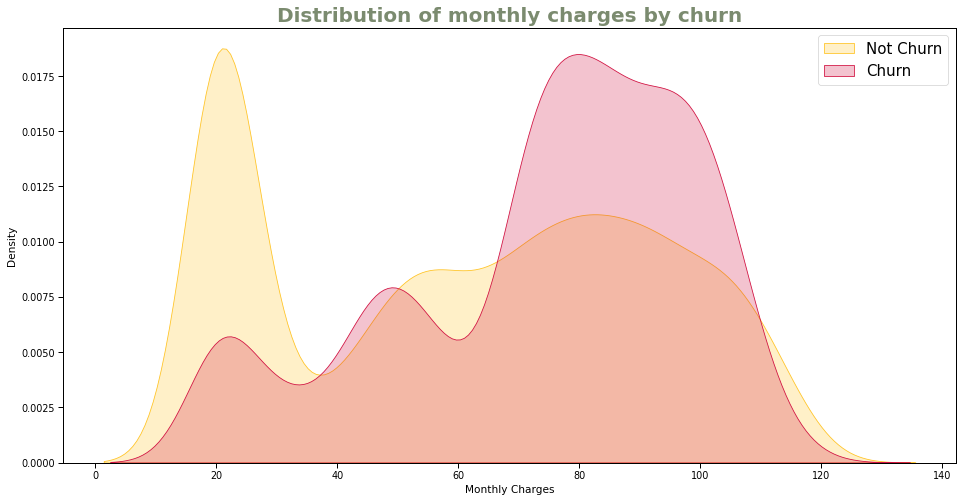

In [43]:
sns.set_context("paper",font_scale=1.1)
_, ax = plt.subplots(figsize=(16,8))
ax = sns.kdeplot(eda.MonthlyCharges[(eda["Churn"] == 'No') ],
                color=color_discrete_sequence[4], shade = True);
ax = sns.kdeplot(eda.MonthlyCharges[(eda["Churn"] == 'Yes') ],
                ax =ax, color=color_discrete_sequence[0], shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right',fontsize=15);
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn',fontdict={'fontsize':20,'color':'#7b8b6f','fontweight':'bold'});

We can see from the graph above, the tendency of churning increases as the monthly charges increases.

This is a pretty much enlightening category since we can confidently conclude that price does affect the churning decision from the customers.

### Distribution of Total Charges by Churn

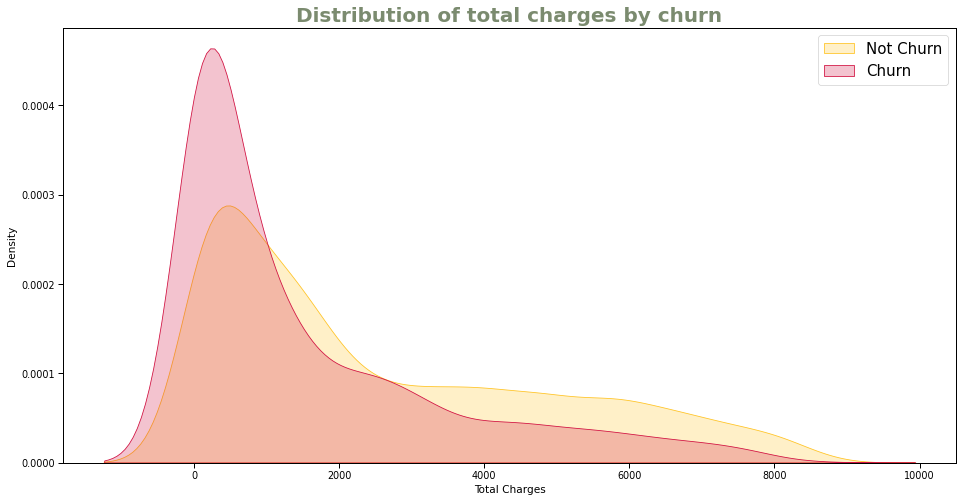

In [44]:
sns.set_context("paper",font_scale=1.1)
_, ax = plt.subplots(figsize=(16,8))
ax = sns.kdeplot(eda.TotalCharges[(eda["Churn"] == 'No') ],
                color=color_discrete_sequence[4], shade = True);
ax = sns.kdeplot(eda.TotalCharges[(eda["Churn"] == 'Yes') ],
                ax =ax, color=color_discrete_sequence[0], shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right',fontsize=15);
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn',fontdict={'fontsize':20,'color':'#7b8b6f','fontweight':'bold'});

But weirdly enough, if we see the total charges, there is no much difference in the charges between those who decides to churn and not churn.

### Distribution of Tenure by Churn

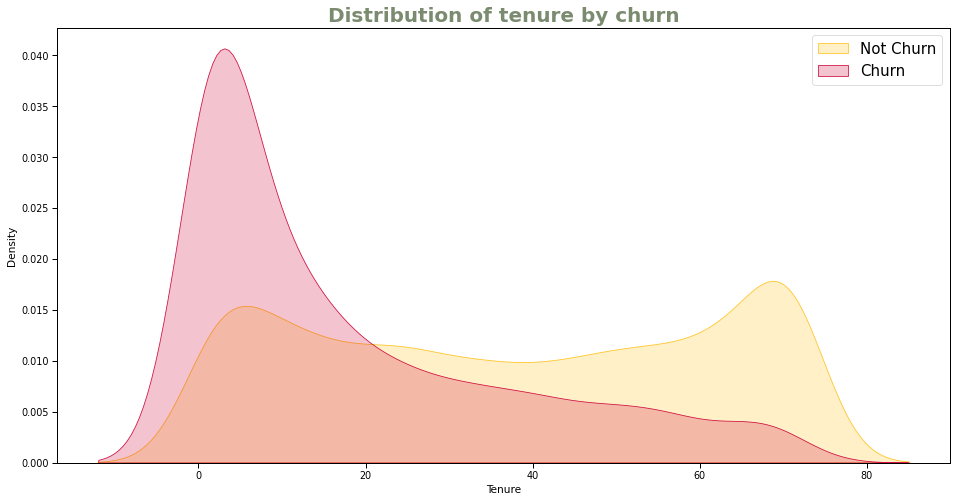

In [45]:
_, ax = plt.subplots(figsize=(16,8))
ax = sns.kdeplot(eda.tenure[(eda["Churn"] == 'No') ],
                color=color_discrete_sequence[4], shade = True);
ax = sns.kdeplot(eda.tenure[(eda["Churn"] == 'Yes') ],
                ax =ax, color=color_discrete_sequence[0], shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right',fontsize=15);
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of tenure by churn',fontdict={'fontsize':20,'color':'#7b8b6f','fontweight':'bold'});

Now we have the churn distribution by tenure and this kind of make the total charges distribution a little more make sense.

We can see that here people who has short term tenure tend to churn way higher than those who has longer term tenure.

Thus, probably there are lots of customers who tried all sort of services (hence **Higher Total Charges**) in a short term tenure just for the sake of trial and error.

## Data Preprocessing

Next we are going to preprocess this data.

## Data Inference

We are going to separate the inference data from the data we are going to use for training and testing.

In [46]:
data_inf = data1.sample(10, random_state = 22)

In [47]:
#removing data_inf
data_train_test = data1.drop(data_inf.index)

And also resetting index for both inference data and train test data

In [48]:
#reset index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## Split Dataset

For the train test data, we are going to split it. But before that, we are defining the X (features) and y (target):

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# define X and Y
X = data_train_test.drop(['Churn'], axis=1)
y = data_train_test['Churn']

X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7018,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7019,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7020,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


For splitting, we are going to do it twice. First we are splitting it by Train and Test:

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 22, stratify = y)

print(X_train.shape)
print(X_test.shape)

(5617, 20)
(1405, 20)


Next we are splitting the train into Train adn validation:

In [52]:
# split train val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

print(X_train.shape)
print(X_val.shape)

(4493, 20)
(1124, 20)


## Data Cleaning

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [54]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

binary_cat_cols = [cname for cname in cat_columns if len(X_train[cname].unique()) == 2]
multiclass_cat_cols = [cname for cname in cat_columns if len(X_train[cname].unique()) > 2]

In [55]:
class columnDropperTransformer():
    def __init__(self, columns):
        self.columns = columns

    def transform(self, X, y=None):
        return X.drop(self.columns, axis=1)

    def fit(self, X, y=None):
        return self

dropped_columns = ['customerID', 'PhoneService', 'MultipleLines']
binary_cat_cols = [cname for cname in cat_columns if len(X_train[cname].unique()) == 2]
binary_cat_cols.remove('PhoneService')
multiclass_cat_cols = [cname for cname in cat_columns if len(X_train[cname].unique()) > 2]
multiclass_cat_cols.remove('customerID')
multiclass_cat_cols.remove('MultipleLines')

numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)
binary_cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OrdinalEncoder())
    ]
)
multiclass_cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

preprocessor = Pipeline(
    steps=[
        ("drop_columns", columnDropperTransformer(dropped_columns)),
        ("normalization", ColumnTransformer(
            transformers=[
                ('num_input', numerical_transformer, num_columns),
                ('bin_cat_input', binary_cat_transformer, binary_cat_cols),
                ('multi_cat_input', multiclass_cat_transformer, multiclass_cat_cols)
            ], remainder='passthrough'
        )),
        # ("oversampling", SMOTENC(random_state=random_state, categorical_features=list(range(2,37)))),
        ("reduction", PCA(n_components=0.99))
    ], verbose=True
)
y_train.replace({"Yes": 1, "No": 0}, inplace=True)
y_val.replace({"Yes": 1, "No": 0}, inplace=True)
y_test.replace({"Yes": 1, "No": 0}, inplace=True)


In [56]:
binary_cat_cols

['gender', 'Partner', 'Dependents', 'PaperlessBilling']

In [57]:
X_train_ok = preprocessor.fit_transform(X_train)
X_test_ok = preprocessor.transform(X_test)
X_val_ok = preprocessor.transform(X_val)

[Pipeline] ...... (step 1 of 3) Processing drop_columns, total=   0.0s
[Pipeline] ..... (step 2 of 3) Processing normalization, total=   0.0s
[Pipeline] ......... (step 3 of 3) Processing reduction, total=   0.0s


## Model Definition

Next we are going to start our Model Definition. Below I'm going to use two kinds of API.
1. Functional API
2. Sequential API

But before that, we are importing the most important libraries we are going to use :

In [58]:
import tensorflow as tf
from tensorflow import keras

### Functional API

We will start with the Functional API

In [59]:
from keras.layers import Input
from keras.layers import Dense

In [62]:
from keras import Model
from keras.layers import Dropout

First, we are going to define the model first:

In [63]:
# Functional API
data_input = Input(shape=(19,))
hidden_1 = Dense(20, activation='relu')(data_input)
drop_1 = Dropout(0.50)(hidden_1)
hidden_2 = Dense(20, activation='relu')(drop_1)
output_layer = Dense(1, activation='sigmoid')(hidden_1)

model_2 = Model(inputs=data_input, outputs=output_layer)

#summarize layers
print(model_2.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_1 (Dense)             (None, 20)                400       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________
None


And then compiling it:

In [64]:
model_2.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3))
history_2 = model_2.fit(X_train_ok, y_train, epochs=300,
                    validation_data=(X_val_ok, y_val))
eval_test = model_2.evaluate(X_test_ok, y_test)
y_pred2 = model_2.predict(X_test_ok)

Epoch 1/300
141/141 [==============================] - 1s 4ms/step - loss: 0.6515 - val_loss: 0.6380
Epoch 2/300
141/141 [==============================] - 0s 1ms/step - loss: 0.6232 - val_loss: 0.6112
Epoch 3/300
141/141 [==============================] - 0s 2ms/step - loss: 0.6000 - val_loss: 0.5892
Epoch 4/300
141/141 [==============================] - 0s 2ms/step - loss: 0.5809 - val_loss: 0.5710
Epoch 5/300
141/141 [==============================] - 0s 2ms/step - loss: 0.5650 - val_loss: 0.5558
Epoch 6/300
141/141 [==============================] - 0s 2ms/step - loss: 0.5517 - val_loss: 0.5429
Epoch 7/300
141/141 [==============================] - 0s 2ms/step - loss: 0.5403 - val_loss: 0.5320
Epoch 8/300
141/141 [==============================] - 0s 2ms/step - loss: 0.5307 - val_loss: 0.5226
Epoch 9/300
141/141 [==============================] - 0s 1ms/step - loss: 0.5223 - val_loss: 0.5145
Epoch 10/300
141/141 [==============================] - 0s 1ms/step - loss: 0.5150 - val_lo

After that, we will print the metrics graph to see it's performance:

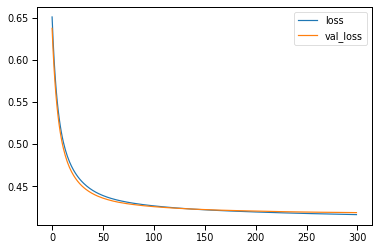

In [65]:
metrics = pd.DataFrame(history_2.history)
metrics[['loss', 'val_loss']].plot();

In [66]:
y_pred2 = np.where(y_pred2 < 0.5, 0, 1).squeeze()

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1031
           1       0.61      0.52      0.56       374

    accuracy                           0.78      1405
   macro avg       0.72      0.70      0.71      1405
weighted avg       0.77      0.78      0.78      1405



### Sequential API

Next, we are going to use the sequential API

In [69]:
X_train_ok.shape

(4493, 19)

In [70]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [71]:
model = Sequential()
model.add(Dense(20, input_shape=(19,), activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
)

history = model.fit(X_train_ok,y_train,epochs=300, batch_size=10, validation_data=(X_val_ok, y_val))

Epoch 1/300
450/450 [==============================] - 1s 2ms/step - loss: 0.6397 - accuracy: 0.6793 - val_loss: 0.5067 - val_accuracy: 0.7464
Epoch 2/300
450/450 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7282 - val_loss: 0.4759 - val_accuracy: 0.7464
Epoch 3/300
450/450 [==============================] - 1s 2ms/step - loss: 0.5182 - accuracy: 0.7343 - val_loss: 0.4613 - val_accuracy: 0.7464
Epoch 4/300
450/450 [==============================] - 1s 2ms/step - loss: 0.5198 - accuracy: 0.7369 - val_loss: 0.4630 - val_accuracy: 0.7464
Epoch 5/300
450/450 [==============================] - 1s 2ms/step - loss: 0.4996 - accuracy: 0.7418 - val_loss: 0.4548 - val_accuracy: 0.7464
Epoch 6/300
450/450 [==============================] - 1s 2ms/step - loss: 0.4946 - accuracy: 0.7447 - val_loss: 0.4544 - val_accuracy: 0.7509
Epoch 7/300
450/450 [==============================] - 1s 2ms/step - loss: 0.4804 - accuracy: 0.7529 - val_loss: 0.4451 - val_accuracy: 0.7580

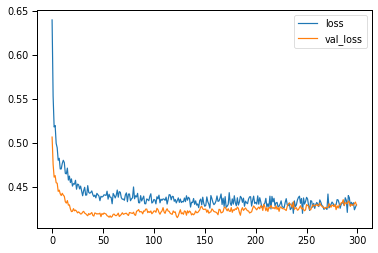

In [72]:
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot();

We can see from the graph that the performance is way better than the previous Functional API

In [73]:
y_pred = model.predict(X_test_ok)
y_pred = np.where(y_pred < 0.5, 0, 1).squeeze()

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1031
           1       0.58      0.47      0.52       374

    accuracy                           0.77      1405
   macro avg       0.70      0.67      0.69      1405
weighted avg       0.76      0.77      0.76      1405



### Using Pipeline

In [76]:
import tensorflow as tf
from tensorflow import keras

In [77]:
#Train Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_ok, y_train))
train_dataset = train_dataset.batch(100)

#Validation Dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_ok, y_val))
val_dataset = val_dataset.batch(100)

#Test Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_ok, y_test))
test_dataset = test_dataset.batch(100)


#Call Model
modelp = Sequential()
modelp.add(Dense(20, input_shape=(19,), activation="relu"))
modelp.add(Dropout(0.5))
modelp.add(Dense(20, activation="relu"))
modelp.add(Dropout(0.5))
modelp.add(Dense(10, activation="relu"))
modelp.add(Dropout(0.5))
modelp.add(Dense(1, activation="sigmoid"))
modelp.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

#Fit
modelp.fit(train_dataset, epochs=300, validation_data=val_dataset)

Epoch 1/300
45/45 [==============================] - 1s 4ms/step - loss: 0.6792 - accuracy: 0.5916 - val_loss: 0.6040 - val_accuracy: 0.7571
Epoch 2/300
45/45 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.6844 - val_loss: 0.5624 - val_accuracy: 0.7527
Epoch 3/300
45/45 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7153 - val_loss: 0.5304 - val_accuracy: 0.7518
Epoch 4/300
45/45 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.7169 - val_loss: 0.5101 - val_accuracy: 0.7464
Epoch 5/300
45/45 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7258 - val_loss: 0.4962 - val_accuracy: 0.7456
Epoch 6/300
45/45 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7282 - val_loss: 0.4796 - val_accuracy: 0.7464
Epoch 7/300
45/45 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.7325 - val_loss: 0.4748 - val_accuracy: 0.7464
Epoch 8/300
4

In [78]:
modelp.save('gfgModel.h5')
print('Model Saved!')

Model Saved!


In [79]:
import pickle

In [80]:
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

## Model Inference

In [81]:
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8717-VCTXJ,Male,0,No,No,42,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.55,839.40,No
1,3580-GICBM,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.20,No
2,4849-PYRLQ,Female,1,No,No,56,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),73.25,4054.20,No
3,0572-ZJKLT,Female,0,Yes,Yes,46,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,99.65,4630.20,No
4,0961-ZWLVI,Male,0,No,Yes,49,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),109.20,5290.45,No
5,8414-MYSHR,Male,1,No,No,5,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,91.40,449.75,Yes
6,9489-JMTTN,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.75,6595.90,No
7,3137-NYQQI,Male,0,Yes,No,17,Yes,No,DSL,Yes,Yes,No,No,No,Yes,One year,No,Mailed check,64.80,1175.60,No
8,6230-BSUXY,Female,1,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85.00,Yes
9,5160-UXJED,Male,0,No,Yes,17,Yes,No,DSL,No,No,No,No,No,No,One year,No,Mailed check,44.60,681.40,No


In [83]:
data_inf.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [84]:
data_infs = preprocessor.transform(data_inf)

In [85]:
# load model
from tensorflow.keras.models import load_model
savedModel=load_model('gfgModel.h5')
savedModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                400       
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                420       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dropout_6 (Dropout)         (None, 10)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [86]:
y_pred_inf = savedModel.predict(data_infs)

In [87]:
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Churn-Prediction'])

In [88]:
# Concate to Original Dataframe
df_inf_result = pd.concat([data_inf, y_pred_inf], axis=1)

In [89]:
df_inf_result

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn-Prediction
0,8717-VCTXJ,Male,0,No,No,42,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.55,839.40,No,0.012131
1,3580-GICBM,Female,0,Yes,Yes,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.20,1445.20,No,0.001199
2,4849-PYRLQ,Female,1,No,No,56,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),73.25,4054.20,No,0.020692
3,0572-ZJKLT,Female,0,Yes,Yes,46,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,99.65,4630.20,No,0.023321
4,0961-ZWLVI,Male,0,No,Yes,49,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),109.20,5290.45,No,0.160578
5,8414-MYSHR,Male,1,No,No,5,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,91.40,449.75,Yes,0.684117
6,9489-JMTTN,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.75,6595.90,No,0.011566
7,3137-NYQQI,Male,0,Yes,No,17,Yes,No,DSL,Yes,Yes,No,No,No,Yes,One year,No,Mailed check,64.80,1175.60,No,0.166941
8,6230-BSUXY,Female,1,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,85.00,Yes,0.714697
9,5160-UXJED,Male,0,No,Yes,17,Yes,No,DSL,No,No,No,No,No,No,One year,No,Mailed check,44.60,681.40,No,0.102767


## Analysis

### EDA Analysis

1. From the EDA of the services result it can be concluded that there are several columns which affect Customer Churning heavily and there are also columns that aren't affecting the Customer Churn such as The Phone Service and Multiple Lines.
2. The features which affect customer churning, likely to be those who are connected to the Internet Service
3. Further EDA for the prices, we can see price does affect customer churns. As we can see from the Monthly Charges, higher monthly charge responded with higher customer churn rate. However, TotalCharges doesn't seem to complement the conclusion of Monthly Charges.
4. From the tenure EDA, we can see that in this dataset, there are high churn rate within short term tenure period. Thus we can somewhat conclude that this complement the Total Charges EDA. This dataset likely has lots of customers which tries every single service provided (**hence the high Total Charge**) within a short term just for the sake of trial and error. 

### Overall Analysis

- This dataset is a quite small data and highly imbalanced. Although we have handled the imbalance by using SMOTE, the small size of this data still contribute highly to it's unsteadyness during training period.
- There are some features in the columns that could contribute highly to the training result. Such as there are some columns that include 'No Internet Service' or 'No Phone Service' beside the standard 'Yes' and 'No'. As for me, I'm choosing to keep the 'No Internet service' and 'No Phone Service' as it is and doing One Hot Encoding on them since in my opinion they hold different weight values. But there might be other people who chose to include 'No Internet Service' and 'No Phone Service' as No. Thus this one needs further crosschecking with the dataset provider, or better, they could provide some explanation regarding this column.
- Since this data is small, I don't think tensorflow is the suitable model used since it is so easy for the data training to be overfitting.
- Overall, there are lots of things contributing to this data's analysis and training, but if we take it aside, we could say that the data is pretty much representing what it should represents and that is clearly shown during the EDA section.